In [107]:
import pandas as pd

df = pd.read_csv("student_habits_performance.csv", keep_default_na=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

In [108]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [109]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [110]:
df.drop('student_id',axis=1, inplace=True)
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [111]:
# encode
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

prepocessor = ColumnTransformer(
    transformers=[
        ("onehot_part_extra_gen", OneHotEncoder(handle_unknown="ignore"), ["part_time_job", 'extracurricular_participation', 'gender']),
        ('ordi_parental', OrdinalEncoder(categories=[['None', 'High School','Bachelor' ,'Master']]), ['parental_education_level']),
        ('ordi_diet', OrdinalEncoder(categories=[['Poor', 'Fair', 'Good']]), ['diet_quality']),
        ('ordi_internet', OrdinalEncoder(categories=[['Poor', 'Average', 'Good']]), ['internet_quality']),
    ]
)

scaler = Pipeline(steps=[
    ('scale_min_max', MinMaxScaler())
])


print ("done")

done


In [112]:
# predict

X = df.drop(columns=["exam_score"])
y = df["exam_score"]

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

model = KNeighborsRegressor(n_neighbors=65, weights='uniform', algorithm='brute')

pipeline = Pipeline(steps=[
    ("prepocessor", prepocessor),
    ('scaler', scaler),
    ("model", model)
])

pipeline.fit(train_X,train_y)
val_pred = pipeline.predict(val_X)
print(mae(val_y, val_pred))

14.173556923076923


In [113]:
# shape

df.shape

(1000, 15)

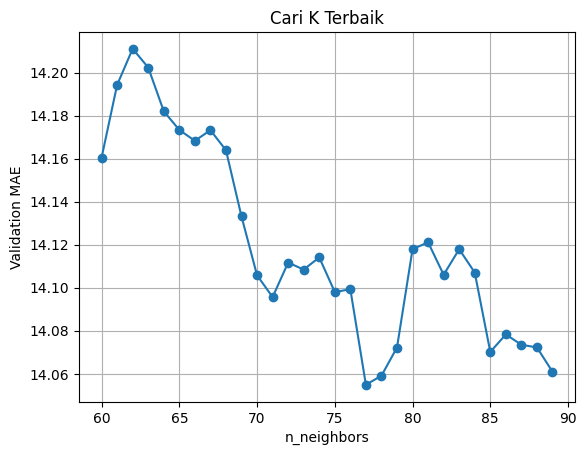

In [114]:
import matplotlib.pyplot as plt

neighbors_range = range(60, 90)
errors = []

for k in neighbors_range:
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline(steps=[
        ("prepocessor", prepocessor),
        ("model", model)
    ])
    pipeline.fit(train_X, train_y)
    pred = pipeline.predict(val_X)
    error = mae(val_y, pred)
    errors.append(error)

plt.plot(neighbors_range, errors, marker='o')
plt.xlabel("n_neighbors")
plt.ylabel("Validation MAE")
plt.title("Cari K Terbaik")
plt.grid(True)
plt.show()


i guess 69

In [115]:
# final test

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=42)
final_pred= pipeline.predict(X_test)
score = mae(y_test, final_pred)
print ("mae : ", score)

mae :  14.424651685393261


In [116]:
y_test.shape

(150,)

In [117]:
import joblib as jb
jb.dump(pipeline, 'model_knnfix.pkl')

['model_knnfix.pkl']